In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('appl_1980_2014.csv')

In [3]:
df.shape

(8465, 7)

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

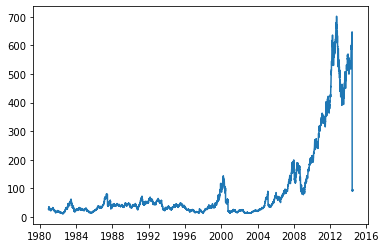

In [9]:
plt.plot(df['Date'], df['Close'])
plt.show()

In [40]:
X = df[['Open','High','Low']].values
y = df['Close'].values

In [41]:
n = len(X)
X0 = np.ones(n)

In [42]:
X = np.c_[X0, X]

In [43]:
X.shape

(8465, 4)

In [44]:
X[0]

array([ 1.  , 96.27, 96.8 , 93.92])

In [37]:
for i in range(1,X.shape[1]):
    min_val = min(X[:,i])
    max_val = max(X[:,i])
    for j in range(n):
        numer = X[j][i] - min_val
        denom = max_val - min_val
        X[j][i] = numer / denom

In [38]:
X[0]

array([1.        , 0.12317551, 0.12346711, 0.12042349])

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
minmax = MinMaxScaler()
scaled_x = minmax.fit_transform(X)

In [53]:
scaled_y = minmax.fit_transform(y.reshape(-1,1))

In [46]:
scaled_x[0]

array([0.        , 0.12317551, 0.12346711, 0.12042349])

In [48]:
b = np.zeros(4)

In [63]:
def cost_function(X,y,b):
    mse = np.sum(((X.dot(b)) - y) ** 2) / n
    return mse

In [71]:
epochs = 1000
alpha = 0.01
def gradient(X,y,b):
    slope = 0
    inter = 0
    cost_history = []
    for epoch in range(epochs):
        y_pred = X.dot(b)
        loss = y_pred - y
        grad_b = (2/n) * loss.dot(X)
        b = b - grad_b * alpha
        err = cost_function(X,y,b)
        cost_history.append(err)
        print("Epoch : {} Loss : {}".format(epoch,err))
    return b, cost_history

In [72]:
b = np.zeros(4)
new_b, cost = gradient(scaled_x, scaled_y.flatten(),b)

Epoch : 0 Loss : 0.0577826628896524
Epoch : 1 Loss : 0.05738029400373507
Epoch : 2 Loss : 0.05698072733210374
Epoch : 3 Loss : 0.05658394335932073
Epoch : 4 Loss : 0.056189922705859596
Epoch : 5 Loss : 0.05579864612715851
Epoch : 6 Loss : 0.05541009451268045
Epoch : 7 Loss : 0.05502424888497967
Epoch : 8 Loss : 0.054641090398774995
Epoch : 9 Loss : 0.05426060034002918
Epoch : 10 Loss : 0.05388276012503507
Epoch : 11 Loss : 0.053507551299507836
Epoch : 12 Loss : 0.053134955537683666
Epoch : 13 Loss : 0.05276495464142472
Epoch : 14 Loss : 0.052397530539330314
Epoch : 15 Loss : 0.05203266528585424
Epoch : 16 Loss : 0.051670341060428344
Epoch : 17 Loss : 0.05131054016659206
Epoch : 18 Loss : 0.050953245031128205
Epoch : 19 Loss : 0.050598438203204525
Epoch : 20 Loss : 0.05024610235352149
Epoch : 21 Loss : 0.049896220273465866
Epoch : 22 Loss : 0.04954877487427025
Epoch : 23 Loss : 0.04920374918617836
Epoch : 24 Loss : 0.048861126357616254
Epoch : 25 Loss : 0.04852088965436928
Epoch : 26 Lo

Epoch : 354 Loss : 0.004874210357612231
Epoch : 355 Loss : 0.004840311366917724
Epoch : 356 Loss : 0.0048066484586791235
Epoch : 357 Loss : 0.004773219988749345
Epoch : 358 Loss : 0.004740024324431622
Epoch : 359 Loss : 0.004707059844399762
Epoch : 360 Loss : 0.004674324938618965
Epoch : 361 Loss : 0.004641818008267184
Epoch : 362 Loss : 0.004609537465657029
Epoch : 363 Loss : 0.004577481734158232
Epoch : 364 Loss : 0.004545649248120642
Epoch : 365 Loss : 0.004514038452797744
Epoch : 366 Loss : 0.004482647804270735
Epoch : 367 Loss : 0.004451475769373118
Epoch : 368 Loss : 0.0044205208256158065
Epoch : 369 Loss : 0.004389781461112776
Epoch : 370 Loss : 0.004359256174507218
Epoch : 371 Loss : 0.0043289434748982085
Epoch : 372 Loss : 0.004298841881767894
Epoch : 373 Loss : 0.004268949924909179
Epoch : 374 Loss : 0.004239266144353919
Epoch : 375 Loss : 0.004209789090301612
Epoch : 376 Loss : 0.004180517323048592
Epoch : 377 Loss : 0.00415144941291771
Epoch : 378 Loss : 0.0041225839401885


Epoch : 795 Loss : 0.00022992935196873964
Epoch : 796 Loss : 0.00022837448741707284
Epoch : 797 Loss : 0.0002268304513923285
Epoch : 798 Loss : 0.0002252971684814861
Epoch : 799 Loss : 0.00022377456379672395
Epoch : 800 Loss : 0.00022226256297176134
Epoch : 801 Loss : 0.00022076109215822496
Epoch : 802 Loss : 0.00021927007802204372
Epoch : 803 Loss : 0.0002177894477398666
Epoch : 804 Loss : 0.0002163191289955057
Epoch : 805 Loss : 0.00021485904997640333
Epoch : 806 Loss : 0.00021340913937012654
Epoch : 807 Loss : 0.00021196932636088184
Epoch : 808 Loss : 0.0002105395406260587
Epoch : 809 Loss : 0.00020911971233279246
Epoch : 810 Loss : 0.00020770977213455628
Epoch : 811 Loss : 0.00020630965116777165
Epoch : 812 Loss : 0.00020491928104844704
Epoch : 813 Loss : 0.00020353859386883599
Epoch : 814 Loss : 0.00020216752219412188
Epoch : 815 Loss : 0.00020080599905912384
Epoch : 816 Loss : 0.00019945395796502633
Epoch : 817 Loss : 0.00019811133287613107
Epoch : 818 Loss : 0.000196778058216630

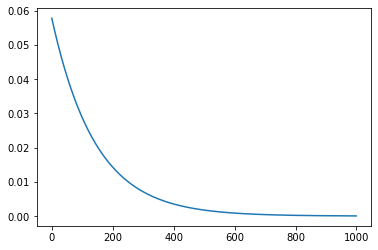

In [73]:
plt.plot(list(range(epochs)), cost)